In [78]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as pgo

import glob
# import tensorflow as tf
# tf.test.gpu_device_name()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [79]:
import io
data_file = pd.read_excel('idGabarito.xlsx',sheet_name = "Planilha identificadores ITSM")
df = data_file[['ID_GRUPO_DONO_SERVICO','ID_SOLICITANTE', 'ID_ANALISTA', 'ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR', 'GRUPO_SOLUCIONADOR']]

In [80]:
#Exploring data
df.head()


,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,GRUPO_SOLUCIONADOR
0,1851,811,1034,705,732,CSMOP SISTEMICO N2
1,1851,1247,591,1851,1558,SERVICE DESK CYBERSERCURITY N1
2,1851,1346,591,1417,1554,SERVICE DESK ATOS (FSN1)
3,1851,1807,1687,1609,723,COSIP/COIMP SISTEMICO N2
4,1851,1525,583,1851,1555,SERVICE DESK ATOS (FSN2)


In [81]:
df.describe()

,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.00000,67417.000000,67417.000000,67417.000000,67417.000000
mean,1740.08925,983.137918,882.045196,1330.632111,1190.576932
std,336.21293,524.983629,452.282687,489.573536,415.792922
min,688.00000,6.000000,132.000000,0.000000,19.000000
25%,1851.00000,608.000000,603.000000,905.000000,730.000000
50%,1851.00000,1001.000000,630.000000,1466.000000,1554.000000
75%,1851.00000,1360.000000,1082.000000,1851.000000,1557.000000
max,1851.00000,1852.000000,1851.000000,1851.000000,1851.000000


In [82]:
df1 = pd.crosstab(index = [df['ID_SOLICITANTE'], df['ID_SERVICO']], columns = [df['ID_GRUPO_SOLUCIONADOR'], df['ID_ANALISTA']])
df1

ID_GRUPO_SOLUCIONADOR     19   20        21   22   671                       \
ID_ANALISTA               1851 160  1851 160  789  178  898  1027 1321 1348   
ID_SOLICITANTE ID_SERVICO                                                     
6              686           0    0    0    0    0    0    0    0    0    0   
               905           0    0    0    0    0    0    0    0    0    0   
               1415          0    0    0    0    0    0    0    0    0    0   
               1851          0    0    0    0    0    0    0    0    0    0   
8              136           0    0    0    0    0    0    0    0    0    0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1849           1851          0    0    0    0    0    0    0    0    0    0   
1850           1851          0    0    0    0    0    0    0    0    0    0   
1851           1851          0    0    0    0    0    0    0    0    0    0   
1852           905           0    0    0    0    0    0    0    0    0    0   
               1851          0    0    0    0    0    0    0    0    0    0   

ID_GRUPO_SOLUCIONADOR      ... 1851                                          \
ID_ANALISTA                ... 955  1000 1051 1139 1209 1341 1408 1812 1827   
ID_SOLICITANTE ID_SERVICO  ...                                                
6              686         ...    0    0    0    0    0    0    0    0    0   
               905         ...    0    0    0    0    0    0    0    0    0   
               1415        ...    0    0    0    0    0    0    0    0    0   
               1851        ...    0    0    0    0    0    0    0    0    0   
8              136         ...    0    0    0    0    0    0    0    0    0   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1849           1851        ...    0    0    0    0    0    0    0    0    0   
1850           1851        ...    0    0    0    0    0    0    0    0    0   
1851           1851        ...    0    0    0    0    0    0    0    0    0   
1852           905         ...    0    0    0    0    0    0    0    0    0   
               1851        ...    0    0    0    0    0    0    0    0    0   

ID_GRUPO_SOLUCIONADOR           
ID_ANALISTA               1851  
ID_SOLICITANTE ID_SERVICO       
6              686           0  
               905           0  
               1415          0  
               1851          0  
8              136           3  
...                        ...  
1849           1851          0  
1850           1851          0  
1851           1851          3  
1852           905           0  
               1851          0  

[9743 rows x 1173 columns]

In [83]:
# Definindo função para validar probabilidade de aparecer determinado Grupo Solucionador
def probStatus(dataset, group_by):
#   df1 = pd.crosstab(index = [df['ID_SOLICITANTE'], df['ID_SERVICO']], columns = [df['ID_GRUPO_SOLUCIONADOR'], df['ID_ANALISTA']]).reset_index()
    df1 = pd.crosstab(index = dataset[group_by], columns = [dataset['ID_GRUPO_SOLUCIONADOR'], dataset['ID_ANALISTA']]).reset_index()
    df1['No'] = df1.iloc[:,1:].sum(axis =1)
    df1['Yes'] = (df1 == 0).sum(axis = 1)
    df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
    return df1[[group_by, 'probShowUp']]


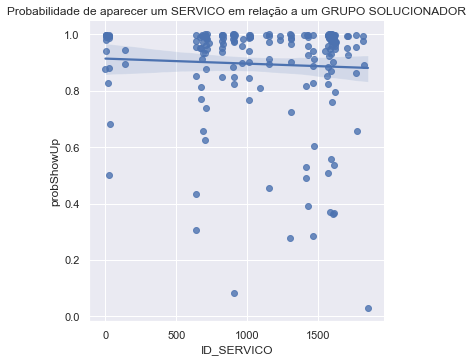

In [95]:

# Probabilidade de relação entre serviço e grupo solucionador
sns.lmplot(data = probStatus(df, 'ID_SERVICO'), x = 'ID_SERVICO', y = 'probShowUp', fit_reg = True)
plt.xlim()
plt.title('Probabilidade de aparecer um SERVICO em relação a um GRUPO SOLUCIONADOR')
plt.show()


In [77]:
df1['No'] = df1.iloc[:,1:].sum(axis =1).astype(int)
df1['Yes'] = (df1 == 0).sum(axis = 1)
df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
df1

ID_GRUPO_SOLUCIONADOR       19  20       21  22 671                     ...  \
ID_ANALISTA               1851 160 1851 160 789 178 898 1027 1321 1348  ...   
ID_SOLICITANTE ID_SERVICO                                               ...   
6              686           0   0    0   0   0   0   0    0    0    0  ...   
               905           0   0    0   0   0   0   0    0    0    0  ...   
               1415          0   0    0   0   0   0   0    0    0    0  ...   
               1851          0   0    0   0   0   0   0    0    0    0  ...   
8              136           0   0    0   0   0   0   0    0    0    0  ...   
...                        ...  ..  ...  ..  ..  ..  ..  ...  ...  ...  ...   
1849           1851          0   0    0   0   0   0   0    0    0    0  ...   
1850           1851          0   0    0   0   0   0   0    0    0    0  ...   
1851           1851          0   0    0   0   0   0   0    0    0    0  ...   
1852           905           0   0    0   0   0   0   0    0    0    0  ...   
               1851          0   0    0   0   0   0   0    0    0    0  ...   

ID_GRUPO_SOLUCIONADOR     1851                                  No   Yes  \
ID_ANALISTA               1139 1209 1341 1408 1812 1827 1851               
ID_SOLICITANTE ID_SERVICO                                                  
6              686           0    0    0    0    0    0    0  1174  1172   
               905           0    0    0    0    0    0    0  1180  1168   
               1415          0    0    0    0    0    0    0  1174  1172   
               1851          0    0    0    0    0    0    0  1181  1167   
8              136           0    0    0    0    0    0    3  1178  1172   
...                        ...  ...  ...  ...  ...  ...  ...   ...   ...   
1849           1851          0    0    0    0    0    0    0  1176  1170   
1850           1851          0    0    0    0    0    0    0  1178  1170   
1851           1851          0    0    0    0    0    0    3  1178  1172   
1852           905           0    0    0    0    0    0    0  1181  1171   
               1851          0    0    0    0    0    0    0  1174  1172   

ID_GRUPO_SOLUCIONADOR     probShowUp  
ID_ANALISTA                           
ID_SOLICITANTE ID_SERVICO             
6              686          0.499574  
               905          0.497445  
               1415         0.499574  
               1851         0.497019  
8              136          0.498723  
...                              ...  
1849           1851         0.498721  
1850           1851         0.498296  
1851           1851         0.498723  
1852           905          0.497874  
               1851         0.499574  

[9743 rows x 1176 columns]

In [130]:
#Agrupamento de qtde de serviço por grupo solucionador
sub_df = df.groupby(['ID_GRUPO_SOLUCIONADOR', 'ID_ANALISTA']).ID_SERVICO.nunique().reset_index().sort_values(by = 'ID_SERVICO')
sub_df.columns = ['ID_GRUPO_SOLUCIONADOR', 'ID_ANALISTA','QTD_SERVICO']
sub_df['ID_SERVICO'] = df['ID_SERVICO']
sub_df['ID_ANALISTA'] = df['ID_ANALISTA']
sub_df['GRUPO_SOLUCIONADOR'] = df['GRUPO_SOLUCIONADOR']

In [136]:
#qtde de grupos
sub_df.ID_GRUPO_SOLUCIONADOR.nunique()

63

In [137]:
#qtde de serviços
sub_df.ID_SERVICO.nunique()

98

In [138]:
df.ID_SERVICO.nunique()

190

In [131]:
#Agrupamento de qtde de serviço por grupo solucionador
sub_df

,ID_GRUPO_SOLUCIONADOR,ID_ANALISTA,QTD_SERVICO,ID_SERVICO,GRUPO_SOLUCIONADOR
0,19,1034,1,705,CSMOP SISTEMICO N2
706,835,1034,1,26,CSMOP SISTEMICO N2
707,836,610,1,1815,SERVICE DESK CYBERSERCURITY N1
708,836,1321,1,821,CADES DBA
709,836,610,1,1851,SERVICE DESK CYBERSERCURITY N1
...,...,...,...,...,...
913,1557,605,49,905,SERVICE DESK CYBERSERCURITY N1
1008,1558,624,50,1612,SERVICE DESK ATOS SISTEMICO N1
827,1554,1851,51,0,SERVICE DESK ATOS (FSN1)
932,1557,575,51,905,SERVICE DESK ATOS (FSN2)


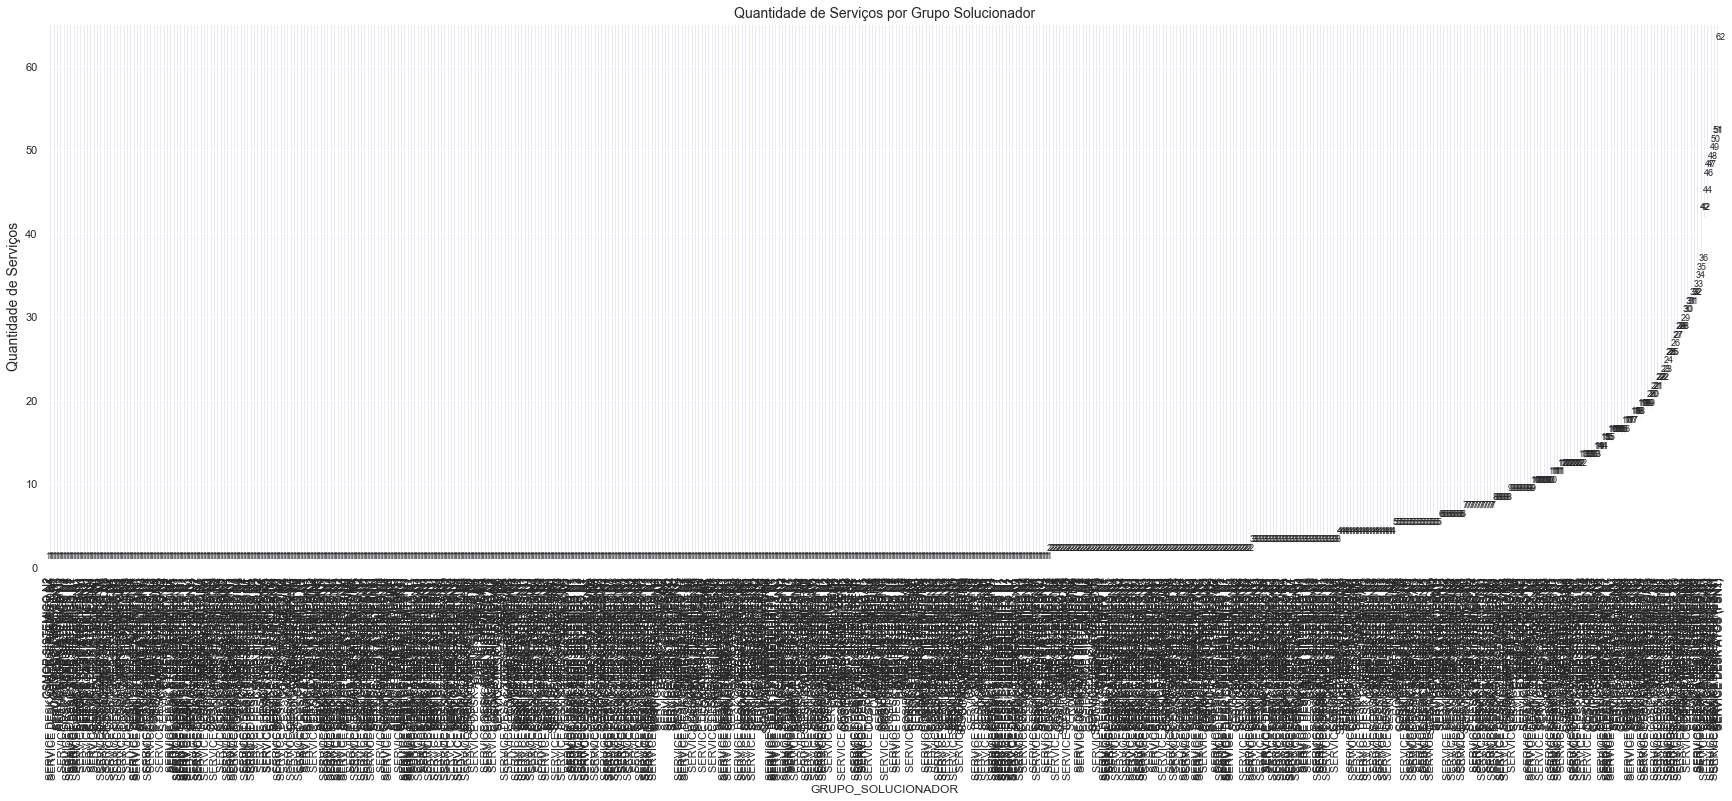

In [132]:
# plotting bar chart qtd_servico
ax = sub_df.plot.bar( x = 'GRUPO_SOLUCIONADOR', y = 'QTD_SERVICO', figsize= (30,10), legend = False)
plt.title("Quantidade de Serviços por Grupo Solucionador", size = 14)
ax.set_ylabel('Quantidade de Serviços', size = 14)
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize= 9)


plt.show()

KeyboardInterrupt: 

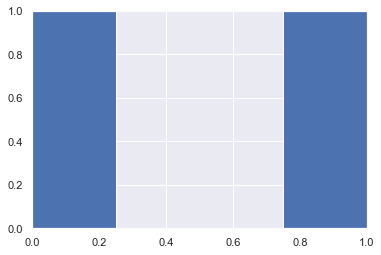

In [29]:
# plotting bar chart
df2 = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']]
ax = df2.plot.bar(  stacked = True)
plt.title("Quantidade de Serviços por Grupo Solucionador", size = 14)
plt.ylim()


plt.show()

In [ ]:

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].iloc[:len(df)]
df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


kmeans.fit(df_kmeans)

df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO', colormap='viridis', figsize=(15, 10))
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

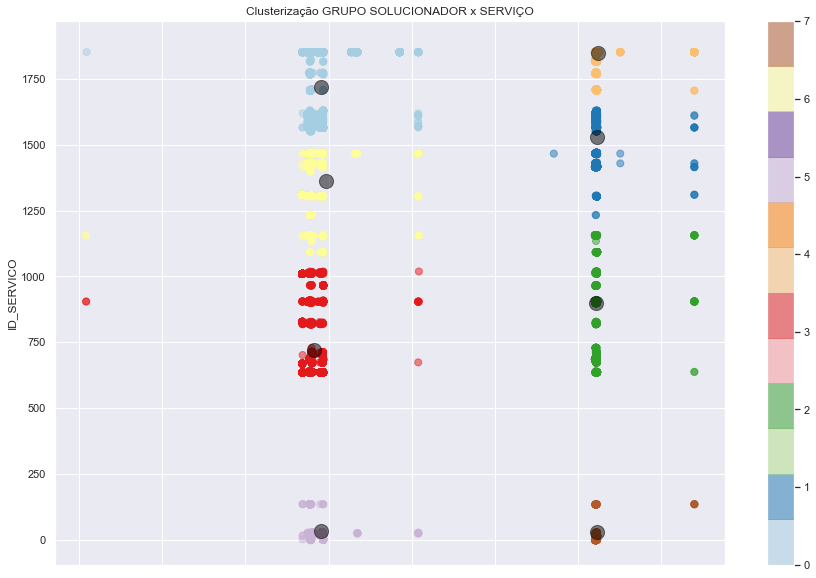

In [31]:

clusters = 8
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


model = kmeans.fit(df_kmeans)
y_pred = kmeans.predict(df_kmeans) #predicting labels (y) and saving to y_pred 
centers = kmeans.cluster_centers_ #cluster centers as determined by the k-means estimator

#ploting cluster
df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO',c=y_pred, cmap=plt.cm.Paired, figsize=(15, 10), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')



In [48]:
#Show the cluster
df['cluster'] = y_pred
df.iloc[:60]

C:\Users\barba\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,GRUPO_SOLUCIONADOR,cluster
0,1851,811,1034,705,732,CSMOP SISTEMICO N2,3
1,1851,1247,591,1851,1558,SERVICE DESK CYBERSERCURITY N1,4
2,1851,1346,591,1417,1554,SERVICE DESK ATOS (FSN1),1
3,1851,1807,1687,1609,723,COSIP/COIMP SISTEMICO N2,0
4,1851,1525,583,1851,1555,SERVICE DESK ATOS (FSN2),4
5,1851,1194,1146,1612,694,COAIS INFRAESTRUTURA,0
6,1851,1207,632,905,1554,SERVICE DESK ATOS (FSN1),2
7,1851,1547,973,673,732,CSMOP SISTEMICO N2,3
8,1851,1813,893,1466,687,CIGEC SISTEMICO N2,6
9,1851,1174,624,1609,1557,SERVICE DESK ATOS SISTEMICO N1,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df_cluster = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].values
df_cluster
# cluster.fit_predict(df_cluster)

# plt.figure(figsize=(10, 7))
# plt.scatter(df_cluster.ID_GRUPO_SOLUCIONADOR, df_cluster.ID_SERVICO, c=cluster.labels_, cmap='rainbow')
